## Febbraio 2016

In [40]:
import pandas as pd
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

### Esercizio 0
### 0.1
$i = 1,...,7$

$$X_i = \begin{cases}
0 & giorno\;i\;non\;piove\\
1& altrimenti
\end{cases}$$

### 0.2
$E_1$ = "piove in almeno un giorno infrasettimanale"

$$P(E_1) = \displaystyle 1- \sum_{i=1}^5 f_X(i) = 1- (1-p)^5$$

$E_2$ = "non piove nel fine settimana"

$$P(E_2) = \displaystyle \sum_{i=6}^7 f_X(i) = (1-p)^2$$

### 0.3
Gli eventi considerati sono indipendenti, ma non mutuamente esclusivi. Questo perchè la pioggia in un giorno non influenza gli altri.

### 0.4
Calcolo la probabilità di $E_1,E_2,E_3$ = "piove in almeno un giorno infrasettimanale, ma non durante il fine settimana",$E_4$ = "piove in almeno un giorno infrasettimanale oppure non piove nel fine settimana"

$$P(E_3) = P(E_1 \cap E_2) = P(E_1) * P(E_2) $$

$E_4 = E_1 \cup E_2 $ 
$$P(E_1 \cup E_2) = P(E_1)+P(E_2) - P(E_1 \cap E_2)$$

In [11]:
p = 0.4
e1 = 1 - (1-p)**5 ### E_1
e2 = (1-p)**2 ### E_2
e3 = e1*e2
e4 = e1+e2-e3
print(e1,e2,e3,e4)

0.9222400000000001 0.36 0.33200640000000003 0.9502336


### Esercizio 1
### 1.1
$$D_X = \{1,...,7\}$$

### 1.2
$$X \sim Binom(p,7)$$

$$f_X(x) = \binom{7}{x}p^x(1-p)^{7-x}I_{0,...,7}(x)$$

### 1.3

$$P(|T_n-p| \leq 0.25) \geq 0.4$$
$E(X) = p, Var(X) = p(1-p)$
$$2\Phi(\frac{0.25\sqrt{n}}{\sqrt{p(1-p)}})-1 \geq 0.4$$
$$2\Phi(\frac{0.25\sqrt{n}}{\sqrt{p(1-p)}}) \geq 1.4$$
$$\frac{0.25\sqrt{n}}{\sqrt{p(1-p)}}\geq \Phi^{-1}(0.7)$$

Sappiamo che p = 0.4
$$\frac{0.25\sqrt{n}}{\sqrt{0.4(1-0.4)}}\geq \Phi^{-1}(0.7)$$
$$\sqrt{n}\geq \frac{\Phi^{-1}(0.7)\sqrt{0.24}}{0.25}$$

In [25]:
Z = st.norm()
p = .4
n = ((Z.ppf(0.7)*(math.sqrt(0.24)))/(0.25))**2
n

1.0559842472772705

### Esercizio 2

In [36]:
df = pd.read_csv('DATI-AMBIENTE.txt',sep=";",decimal=",",na_values=' ')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
PROVINCIA                           150 non-null object
C6H6                                27 non-null object
SO2                                 38 non-null object
CO                                  57 non-null object
NO2                                 138 non-null float64
O3                                  74 non-null float64
O3_GIORNI_SUPERAMENTO_TOLLERANZA    77 non-null float64
O3_GIORNI_SUPERAMENTO_ALLARME       77 non-null float64
PM10                                71 non-null float64
PM2_5                               26 non-null float64
Pb                                  14 non-null object
As                                  14 non-null object
Ni                                  14 non-null object
Cd                                  14 non-null object
BaP                                 13 non-null object
dtypes: float64(6), object(9)
memory usage: 17.7+ KB


### 2.1

In [37]:
len(df)

150

### 2.2

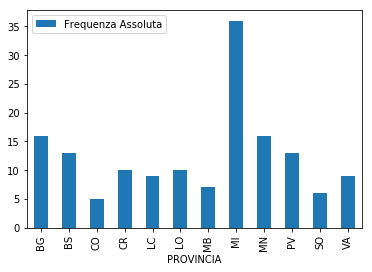

In [42]:
fprov = pd.crosstab(index=df['PROVINCIA'],colnames=[''],columns="Frequenza Assoluta")
fprov.plot.bar()
plt.show()

### 2.3
La provincia meno rappresentata è Como, mentre quella più rappresentata è Milano

In [51]:
print(df['PROVINCIA'].value_counts().sort_values().head(1))
print(df['PROVINCIA'].value_counts().sort_values().tail(1))

CO    5
Name: PROVINCIA, dtype: int64
MI    36
Name: PROVINCIA, dtype: int64


### 2.4
L'eterogeneità è molto vicino a 1 quindi c'è una buona distribuzione.

In [52]:
def gini(series):
    return 1 - sum(series.value_counts(normalize=True)
                         .map(lambda f: f**2))

def normalized_gini(series):
    s = len(series.unique())
    return s * gini(series)/(s-1)

normalized_gini(df['PROVINCIA'].dropna())

0.9639757575757577

### 2.5

In [54]:
df['C6H6'].value_counts().describe()

count    18.000000
mean      1.500000
std       0.857493
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: C6H6, dtype: float64

In [55]:
df['SO2'].value_counts().describe()

count    13.000000
mean      2.923077
std       2.498718
min       1.000000
25%       1.000000
50%       1.000000
75%       4.000000
max       8.000000
Name: SO2, dtype: float64

In [56]:
df['CO'].value_counts().describe()

count    11.000000
mean      5.181818
std       3.919647
min       1.000000
25%       2.000000
50%       4.000000
75%       7.000000
max      13.000000
Name: CO, dtype: float64

### 2.6

### 2.7
Concentrazione a: cadmio

Concentrazione b: benzoapirene

### 2.8

In [71]:
df['O3'].value_counts(normalize=True)

47.0    0.108108
42.0    0.094595
50.0    0.067568
44.0    0.067568
40.0    0.067568
55.0    0.054054
48.0    0.054054
37.0    0.054054
46.0    0.054054
45.0    0.040541
41.0    0.040541
38.0    0.040541
60.0    0.027027
43.0    0.027027
35.0    0.027027
39.0    0.027027
61.0    0.013514
56.0    0.013514
34.0    0.013514
93.0    0.013514
53.0    0.013514
51.0    0.013514
52.0    0.013514
59.0    0.013514
49.0    0.013514
54.0    0.013514
58.0    0.013514
Name: O3, dtype: float64

### 2.9

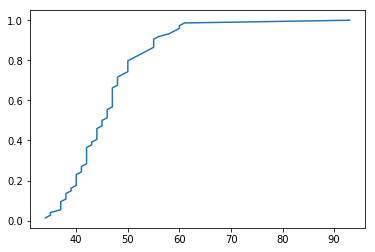

In [72]:
import statsmodels.distributions as dm
dist = dm.ECDF(df.O3.dropna())
plt.plot(dist.x, dist.y)
plt.show()

### 2.10

In [75]:
len(df[df['O3'] == 46])

4

### 2.11


In [81]:
mask1 = df['O3'] > 45
mask2 = df['O3'] < 50
len(df[mask1 & mask2]) + len(df[df['O3'] == 45]) + len(df[df['O3'] == 50])

25

### 2.12

### 2.13
X = numero dei giorni inun anno nei quali viene superata la soglia per l'ozono

n = 150, $X_1,...,X_n$ campione 

In [93]:
tn = df['O3_GIORNI_SUPERAMENTO_TOLLERANZA'].mean() #valore atteso
dvn = df['O3_GIORNI_SUPERAMENTO_TOLLERANZA'].std()
print(tn,dvn)

11.207792207792208 8.025186769982142


### 2.14
Si potremmo dedurre che segua una legge binomiale per via della definizione: (0 non superamento, 1 superamento).
Anche il grafico sembra rispettare.

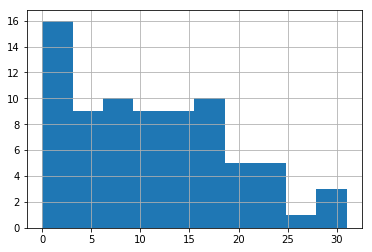

In [94]:
df['O3_GIORNI_SUPERAMENTO_TOLLERANZA'].hist()
plt.show()